<a href="https://colab.research.google.com/github/ManuelN12/Linear_Regression/blob/main/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Lineal in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Some synthetic data

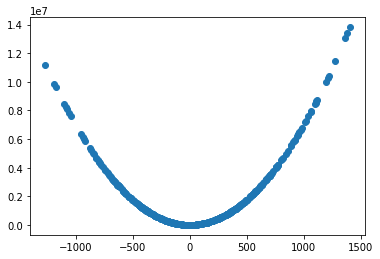

In [ ]:
#Generate some synthetic data  Y= a2*x^2-a1*X+a0 = b_real + w1_real*X -w2_real*x ^2
w1_real = 8
w2_real = 7
b_real=5
N = 500
X = np.random.normal(50, 500, N)  # np.random.normal(mean, dev standar, size of the data)
noise = 2*np.random.normal(0, 100, N)
Y = -np.dot(X,w1_real)+np.dot(X**2,w2_real) + b_real + noise 
plt.scatter(X,Y)

## Functions:

In [ ]:
def cal_error(Y,Y_predict):
  '''
  Parameters:
  ------------------
  Y : vector with the data
  Y_predict : vector with the predictions 

  Returns 
  ------------------
  The MSE between the original value y and the prediction y_prediction
  
  '''
  N = Y.shape[0]
  error = np.sum((Y-Y_predict)**2)/N
  return error


In [ ]:
def initialize_model():
  '''
  Initialize the value of w and b

  Returns
  -----------
  w,b: The initial value of w and b
  '''
  w1 = np.random.normal(0,2)
  w2 = np.random.normal(0,2)
  b = np.random.normal(0,2)

  return [w2,w1,b]
  

In [ ]:
def predict(w2,w1,b,X):
  '''
  Parameters:
  ------------------
  w2, w1, b : parameters of the lineal model
  X : data
  Returns 
  ------------------
  The prediction Y_prediction = w2*X**2 - w1*X + b
  
  '''
  return w2*X*X -w1*X+b

In [ ]:
def gradients(w2_current,w1_current,b_current,alpha,X,Y):
  ''' 
  Calculate the gradients

  Parameters:
  --------------
  w_current, b_current: the current values of w and b
  alpha: learning rate
  X,Y : Vectors of the Data

  Returns
  ---------------------
  w, b : the update value of w and b 
  '''
  N = X.shape[0]

  # Calculating the gradients      
  dw2 = -(2/N)*np.sum((X**2)*(Y-(w2_current*X**2-w1_current*X+b_current)))
  dw1 = (2/N)*np.sum(X*(Y-(w2_current*X**2-w1_current*X+b_current)))
  db=-(2/N)*np.sum((Y-(w2_current*X**2-w1_current*X+b_current)))

  # Updating w and b
  w2 = w2_current - alpha*dw2
  w1 = w1_current - alpha*dw1
  b = b_current - alpha*db

  #print("Dw2: ",dw2,"dw1:",dw1,"db:",db)
  #print(w,b)

  return w2, w1, b

## The initial model

Text(0.5, 1.0, 'Error = 1218412635738.88')

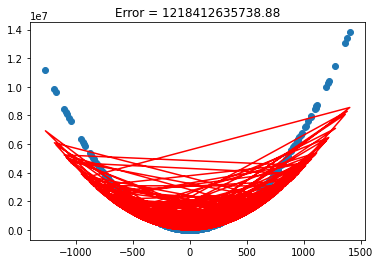

In [ ]:
[w2,w1,b] = initialize_model() # To initialize the model, i.e. the values of w1 and b.
Y2 = np.dot(X**2,w2)- np.dot(X,w1)+ b
error = cal_error(Y,Y2)
plt.scatter(X,Y) # Draw the original data
plt.plot(X,Y2,'r') # Draw the prediction
plt.title(f"Error = %.2f" % error)

## Fit the model

In [ ]:
# Fit the model
Error = []
alpha = 0.0000000000000009
[w2,w1,b] = initialize_model()
#print("c",c)
epochs = 60000


print("----------------------------------------------")
print("----------------------------------------------\n")

for i in range(epochs):
  [w2,w1,b] = gradients(w2,w1,b,alpha,X,Y) #update w and b
  #print(w2,w1,b)
  #print("hola",aa)
  #if (w2>=1E300 or w1>=1E300 or b>=1E300 or w2<=-1E300 or w1<=-1E300 or b<=-1E300):
   # break
  Y_predict = predict(w2,w1,b,X) # Calculate the new Y_predict
  #print("Hola",Y_predict)
  error = cal_error(Y,Y_predict)
  if ((i+1)%200 == 0):
    Error.append(error)
  if ((i+1)%2000 == 0):       
    print("\n------------Epoch ",i)
    print("Model w2= ",w2,"w1=",w1,"b=",b)
    print("Error = ", error)
    




----------------------------------------------
----------------------------------------------


------------Epoch  1999
Model w2=  4.029971759548847 w1= 2.7489320075545174 b= -1.3698727467857177
Error =  1510896612616.4827

------------Epoch  3999
Model w2=  5.39732527984674 w1= 2.7485552944699996 b= -1.3698707768846492
Error =  439586260744.998

------------Epoch  5999
Model w2=  6.134861285774366 w1= 2.7483541331536805 b= -1.369869714177638
Error =  127898227340.922

------------Epoch  7999
Model w2=  6.532680395698613 w1= 2.7482476625999124 b= -1.3698691408015005
Error =  37215420063.43972

------------Epoch  9999
Model w2=  6.747259810319121 w1= 2.748192267238738 b= -1.369868831365244
Error =  10832079491.74203

------------Epoch  11999
Model w2=  6.86300167423191 w1= 2.7481644212937395 b= -1.369868664295366
Error =  3156085760.2500315

------------Epoch  13999
Model w2=  6.925431610214919 w1= 2.7481514352103056 b= -1.3698685740164074
Error =  922824973.9813735

------------Epoch  

## Test the error model

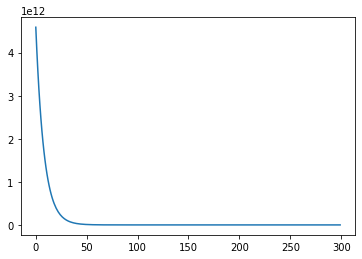

In [ ]:
plt.plot(Error)

Text(0.5, 1.0, 'Error = 6473740.68')

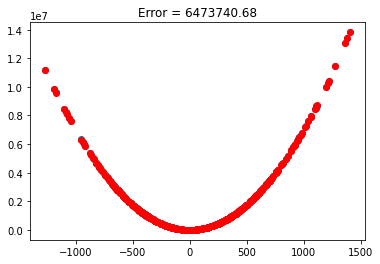

In [ ]:
Y2 = predict(w2,w1,b,X)
error = cal_error(Y,Y2)
plt.scatter(X,Y)
plt.plot(X,Y2,'ro')
plt.title(f"Error = %.2f" % error)